In [ ]:
#hide
#all_slow

In [ ]:
#hide
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
import pandas as pd

![CI](https://github.com/BojarLab/glycowork/workflows/CI/badge.svg)

# Glycowork


<img src="./glycowork_badge_wo_bg.jpg" width="200" />

Glycans are a fundamental biological sequence, similar to DNA, RNA, or proteins. Glycans are complex carbohydrates that can form branched structures comprising monosaccharides and linkages as constituents. Despite being conspicuously absent from most research, glycans are ubiquitous in biology. They decorate most proteins and lipids and direct the stability and functions of biomolecules, cells, and organisms. This also makes glycans relevant to every human disease.

The analysis of glycans is made difficult by their nonlinearity and their astounding diversity, given the large number of monosaccharides and types of linkages. `Glycowork` is a Python package designed to process and analyze glycan sequences, with a special emphasis on glycan-focused data science and machine learning. Next to various functions to work with glycans, `glycowork` also contains glycan data that can be used for model training, motif comparisons, etc.

If you use `glycowork` or any of our datasets in your project, please cite [Thomes et al., 2021](https://academic.oup.com/glycob/advance-article/doi/10.1093/glycob/cwab067/6311240).

The inspiration for `glycowork` can be found in [Bojar et al., 2020](https://doi.org/10.1016/j.chom.2020.10.004) and [Burkholz et al., 2021](https://pubmed.ncbi.nlm.nih.gov/34133929/). There, you can also find examples of possible use cases for the functions in `glycowork`.

The full documentation for `glycowork` can be found here: https://bojarlab.github.io/glycowork/

If you want to contribute to `glycowork`, the best place to start is to read our [contribution guidelines](https://github.com/BojarLab/glycowork/blob/master/CONTRIBUTING.md).

## Install

via pip: <br>
`pip install glycowork` <br>
`import glycowork`

alternative: <br>
`pip install git+https://github.com/BojarLab/glycowork.git` <br>
`import glycowork`

## Data & Models

`Glycowork` currently contains the following main datasets that are freely available to everyone:
- **`df_glycan`**
    - contains >51,000 unique glycan sequences, including labels such as >32,000 species associations, >8,000 tissue associations, and >500 disease associations
- **`glycan_binding`**
    - contains >550,000 protein-glycan binding interactions, from 1,392 unique glycan-binding proteins
    
Additionally, we store these trained deep learning models for easy usage, which can be retrieved with the `prep_model` function:
- **`LectinOracle`**
    - can be used to predict glycan-binding specificity of a protein, given its ESM-1b representation; from [Lundstrom et al., 2021](https://onlinelibrary.wiley.com/doi/10.1002/advs.202103807)
- **`LectinOracle_flex`**
    - operates the same as LectinOracle but can directly use the raw protein sequence as input (no ESM-1b representation required)
- **`SweetNet`**
    - a graph convolutional neural network trained to predict species from glycan, can be used to generate learned glycan representations; from [Burkholz et al., 2021](https://pubmed.ncbi.nlm.nih.gov/34133929/)
- **`NSequonPred`**
    - given the ESM-1b representation of an N-sequon (+/- 20 AA), this model can predict whether the sequon will be glycosylated

## How to use

`Glycowork` currently contains four main modules:
 - **`glycan_data`**
     - stores several glycan datasets and contains helper functions
 - **`ml`**
     - here are all the functions for training and using machine learning models, including train-test-split, getting glycan representations, etc.
 - **`motif`**
     - contains functions for processing glycan sequences, identifying motifs and features, and analyzing them
 - **`network`**
     - contains functions for constructing and analyzing glycan networks (e.g., biosynthetic networks)
     
Below are some examples of what you can do with `glycowork`; be sure to check out the other `examples` in the full documentation for everything that's there.
A non-exhaustive list includes:
- using trained AI models for prediction
- training your own AI models
- motif enrichment analyses
- annotating motifs in glycans
- finding out whether & where glycans are describing the same sequence
- m/z to composition to structure to motif mappings
- mass calculation
- visualizing motif distribution / glycan similarities / sequence properties
- constructing and analyzing biosynthetic networks

In [ ]:
#get motifs, graph features, and sequence features of a set of glycan sequences to train models or analyze glycan properties
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN1P']
from glycowork.motif.annotate import annotate_dataset
out = annotate_dataset(glycans, feature_set = ['known', 'graph', 'exhaustive']).head()

In [ ]:
#hide_input
HTML(out.to_html())

,LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,Internal_LacNAc_type1,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Internal_LacdiNAc_type1,Terminal_LacdiNAc_type1,Internal_LacdiNAc_type2,Terminal_LacdiNAc_type2,bisectingGlcNAc,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series(LewisC),NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a_2,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,core_fucose(a1-3),GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,Gala_series,LPS_core,Nglycan_complex,Nglycan_complex2,Oglycan_core2,Oglycan_core3,Oglycan_core4,Oglycan_core5,Oglycan_core6,Oglycan_core7,Xylogalacturonan,Sialosylparagloboside,LDNF,OFuc,Arabinogalactan_type2,EGF_repeat,Nglycan_hybrid,Arabinan,Xyloglucan,Acharan_Sulfate,M3FX,M3X,1-6betaGalactan,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,betweeness,betwVar,betwMax,eigenMax,eigenMin,eigenAvg,eigenVar,closeMax,closeMin,closeAvg,closeVar,flowMax,flowAvg,flowVar,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,loadMax,loadAvg,loadVar,harmMax,harmMin,harmAvg,harmVar,secorderMax,secorderMin,secorderAvg,secorderVar,size_corona,size_core,nbr_node_types,egap,entropyStation,N,dens,0dHex,"1,4-Anhydro-Gal-ol","1,5-Anhydro-D-AltNAc-ol","1,5-Anhydro-D-FucN-ol","1,5-Anhydro-D-Rha4NAc-ol","1,5-Anhydro-Gal-ol","1,5-Anhydro-GalNAc-ol","1,5-Anhydro-Glc-ol","1,5-Anhydro-Glc-onic","1,5-Anhydro-GlcN2S-ol","1,5-Anhydro-GlcN2S6S-ol","1,5-Anhydro-GlcNAc-ol","1,5-Anhydro-GlcNAc-onic","1,5-Anhydro-Man-ol","1,5-Anhydro-ManNAc-ol","1,5-Anhydro-Xyl-ol","1,5-Anhydro-Xyl2F-ol",1-1,1-2,1-3,1-4,1-5,1-6,1-z,1dAlt-ol,1dEry-ol,"2,3-Anhydro-All","2,3-Anhydro-Man","2,3-Anhydro-Rib","2,5-Anhydro-D-Alt-ol","2,5-Anhydro-D-Alt3S-ol","2,5-Anhydro-D-Tal","2,5-Anhydro-Glc","2,5-Anhydro-L-Man-ol","2,5-Anhydro-Man","2,5-Anhydro-Man-ol","2,5-Anhydro-Man1S-ol","2,5-Anhydro-Man3S-ol","2,5-Anhydro-Man6S","2,5-Anhydro-Tal-ol","2,5-Anhydro-Tal6P","2,6-Anhydro-Glc5NAc-ol","2,6-Anhydro-L-Gul-ol","2,6-Anhydro-L-Gul-onic","2,6-Anhydro-Man-ol","2,6-Anhydro-Tal5NAc-ol","2,7-Anhydro-Kdo","2,7-Anhydro-Kdof",2-3,2-4,2-5,2-6,"3,6-Anhydro-Fruf","3,6-Anhydro-Gal","3,6-Anhydro-Gal2S","3,6-Anhydro-Glc","3,6-Anhydro-L-Gal","3,6-Anhydro-L-Gal2Me",3-1,3-5,3-Anhydro-Gal,3-Anhydro-Gal2S,3dFuc,3dGal,3dLyxHep-ulosaric,"4,7-Anhydro-Kdo","4,7-Anhydro-KdoOPEtN","4,8-Anhydro-Kdo",4-1,4-5,4d8dNeu5Ac,4dAraHex,4dEry-ol,4dFuc,4dGal,4dNeu5Ac,4dThrHexNAcA4en,4eLeg5Ac7Ac,5-1,5-2,5-3,5-4,5-5,5-6,5dAraf,5dAraf3Me,5dLyxf3CFo,5dLyxf3CMe,5dPenf3CFo,6-1,6-3,6-4,6dAll,6dAll3Me,6dAlt,6dAltNAc,6dAltNAc1PP4N,6dAltNAc1PP4NAc,6dAltNAc3PCho,6dAltOAc,6dAltf,6dAltfOAc,6dFruf,6dGal,6dGalNAc,6dGul,6dHex,6dHexN,6dHexNAc4NAc,6dManHep,6dTal,6dTal1PP,6dTal2Ac,6dTal2Ac3Ac,6dTal2Ac3Ac4Ac,6dTal2Ac3Me,6dTal2Ac3Me4Ac,6dTal2Ac4Ac,6dTal2Me,6dTal2Me4Ac,6dTal3Me,6dTal4Ac,6dTalNAc,6dTalNAc1PP,6dTalNAc4Ac,6dTalNAcOAc,6dTalOAc,6dTalOAcOAc,6dTalOAcOMe,6dTalOMe,6dTalOMe-ol,6dTalf,7dNeu5Ac,8dNeu5Ac,8eAci5Ac7Ac,8eLeg,8eLeg5Ac7Ac,8eLeg5Ac7Ac8Ac,8eLeg5Ac7AcGro,8eLeg5But7Ac,8eLegNAcNBut,9dNeu5Ac,Abe,Abe1PP,Abe2Ac,AbeO

In [ ]:
#using graphs, you can easily check whether two glycans are the same - even if they use different bracket notations!
from glycowork.motif.graph import compare_glycans
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                     'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                     'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc'))

#or you could find the largest common subgraph of two glycans
from glycowork.motif.graph import largest_subgraph
print("\nLargest Common Subgraph:")
print(largest_subgraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                     'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc'))

True
False

Largest Common Subgraph:
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc


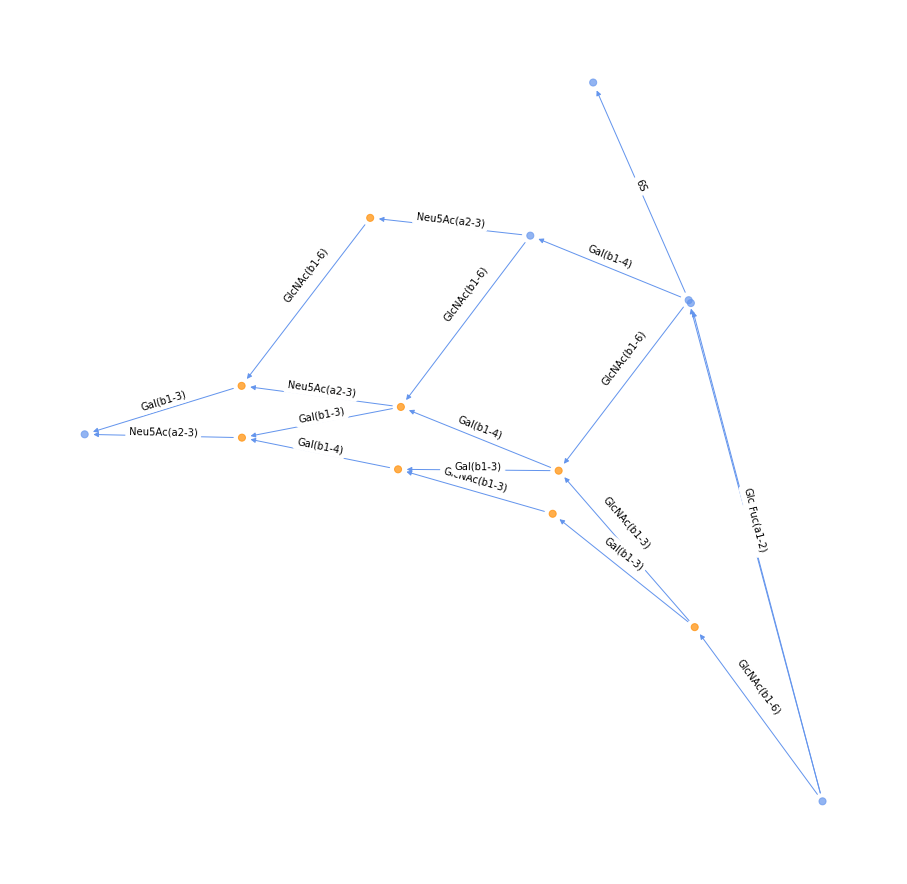

In [ ]:
#given a list of glycans, construct biosynthetic networks and visualize + analyze them
from glycowork.network.biosynthesis import construct_network, plot_network
glycans = ["Gal(b1-4)Glc-ol", "GlcNAc(b1-3)Gal(b1-4)Glc-ol",
           "GlcNAc6S(b1-3)Gal(b1-4)Glc-ol",
           "Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol", "Fuc(a1-2)Gal(b1-4)Glc-ol",
          "Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol"]
network = construct_network(glycans)
plot_network(network, plot_format = 'kamada_kawai')

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_glycan_data.ipynb.
Converted 02_ml.ipynb.
Converted 03_motif.ipynb.
Converted 04_network.ipynb.
Converted 05_examples.ipynb.
Converted index.ipynb.
